In [1]:
using Distributed
using Plots
using JLD
using LaTeXStrings


include("../src/FCSeqTools.jl")
include("../src/functions.jl")

natural_sequences = do_number_matrix_prot(do_letter_matrix("../data/CM_130530_MC.fasta"), 0.2);
ref_seq = natural_sequences[1,:];

In [2]:
q = 21

##### FIRST DATASET ####################################################################
alignment = "CM_alignment"    #"Betalactamases"   
sigla = "(CM)"  #"(BL)"  #                                             
method = "cumulative"
test = "main_test"
stop = 0.9
fraction = 0.3
α = 0.1
notebook = 1
sigla == "(CM)"  ? L = 96  : L = 222

##### SECOND DATASET ##################################################################
alignment2 = "CM_alignment"    #"Betalactamases"   
sigla2 = "(CM)"  #"(BL)"  #                                             
method2 = "cumulative"
test2 = "main_test"
stop2 = 0.9
fraction2 = 0.3
α2 = 0.5
notebook2 = 1
sigla2 == "(CM)"  ? L2 = 96  : L2 = 222

##### THIRD DATASET ###################################################################
alignment3 = "CM_alignment"    #"Betalactamases"   
sigla3 = "(CM)"  #"(BL)"  #                                             
method3 = "cumulative"
test3 = "main_test"
stop3 = 0.9
fraction3 = 0.3
α3 = 0.9
notebook3 = 1
sigla3 == "(CM)"  ? L3 = 96  : L3 = 222

##### DEFINE FOLDER PATHS ##############################################################
folder = "../training/" * alignment * "/" * method * "/" * test * "/"
path = folder * method * string(fraction) * "_stop=" * string(stop) * "_reg=" * string(α) * "_nb" * string(notebook)

folder2 = "../training/" * alignment2 * "/" * method2 * "/" * test2 * "/"
path2 = folder2 * method2 * string(fraction2) * "_stop=" * string(stop2) * "_reg=" * string(α2) * "_nb" * string(notebook2)

folder3 = "../training/" * alignment3 * "/" * method3 * "/" * test3 * "/"
path3 = folder3 * method3 * string(fraction3) * "_stop=" * string(stop3) * "_reg=" * string(α3) * "_nb" * string(notebook3)

##### EXTRACT DATA #####################################################################
h = JLD.load(path*"/h.jld")["data"]
J = JLD.load(path*"/Jij.jld")["data"];
gen_seq = JLD.load(path*"/generated_sequences.jld")["data"];
contact_list = JLD.load(path*"/contact_list.jld")["data"];
site_degree = JLD.load(path*"/site_degree.jld")["data"];

h2 = JLD.load(path2*"/h.jld")["data"]
J2 = JLD.load(path2*"/Jij.jld")["data"];
gen_seq2 = JLD.load(path2*"/generated_sequences.jld")["data"];
contact_list2 = JLD.load(path2*"/contact_list.jld")["data"];
site_degree2 = JLD.load(path2*"/site_degree.jld")["data"];

h3 = JLD.load(path3*"/h.jld")["data"]
J3 = JLD.load(path3*"/Jij.jld")["data"];
gen_seq3 = JLD.load(path3*"/generated_sequences.jld")["data"];
contact_list3 = JLD.load(path3*"/contact_list.jld")["data"];
site_degree3 = JLD.load(path3*"/site_degree.jld")["data"];

In [3]:
q = 21
n_seq = 1_000
ΔE, ΔE_min, ΔE_mean, P_tran_ave = energy_space_connectivity(q, gen_seq[1:n_seq,:], h, J, contact_list, site_degree)
ΔE2, ΔE2_min, ΔE2_mean, P_tran2_ave = energy_space_connectivity(q, gen_seq2[1:n_seq,:], h2, J2, contact_list2, site_degree2);
ΔE3, ΔE3_min, ΔE3_mean, P_tran3_ave = energy_space_connectivity(q, gen_seq3[1:n_seq,:], h3, J3, contact_list3, site_degree3);
ΔE_ave, ΔE_ave_min = mean(ΔE), mean(ΔE_min)
ΔE2_ave, ΔE2_ave_min = mean(ΔE2), mean(ΔE2_min)
ΔE3_ave, ΔE3_ave_min = mean(ΔE3), mean(ΔE3_min);

#### $|\Delta E|$ of the DMS w.r.t. each of the generated sequences

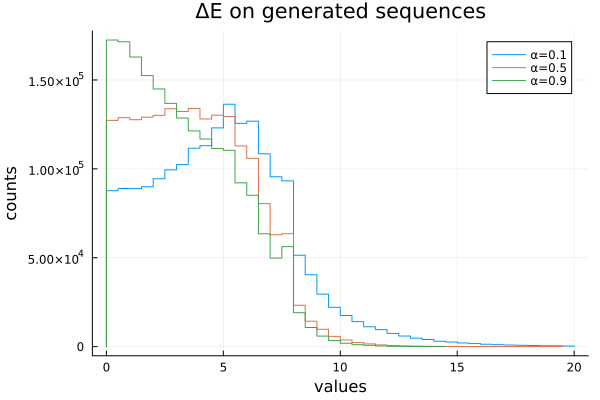

In [4]:
histogram(abs.(ΔE)[abs.(ΔE).<=20], bins= 50, xlabel="values", ylabel="counts", label ="α="*string(α))
histogram!(abs.(ΔE2)[abs.(ΔE2).<=20], bins= 50, xlabel="values", ylabel="counts", label ="α="*string(α2))
histogram!(abs.(ΔE3)[abs.(ΔE3).<=20], bins= 50, title= "ΔE on generated sequences", xlabel="values", ylabel="counts", label ="α="*string(α3))

#### $min(\Delta E)$ for each site of the DMS w.r.t. each of the generated sequences

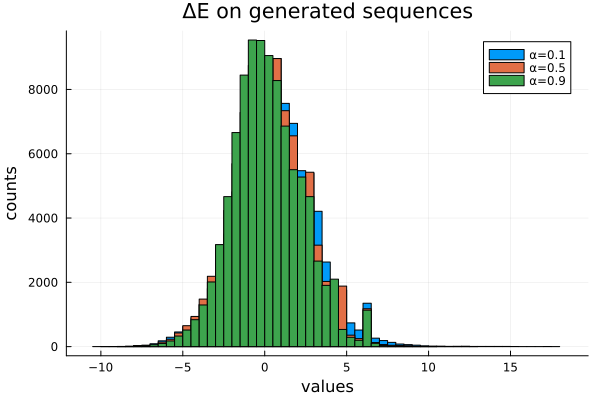

In [5]:
histogram(ΔE_min, bins= 50, xlabel="values", ylabel="counts", label ="α="*string(α))
histogram!(ΔE2_min, bins= 50, xlabel="values", ylabel="counts", label ="α="*string(α2))
histogram!(ΔE3_min, bins= 50, title= "ΔE on generated sequences", xlabel="values", ylabel="counts", label ="α="*string(α3))

#### $average(\Delta E)$ for each site of the DMS w.r.t. each of the generated sequences

In [13]:
histogram(ΔE_mean, bins= 50, xlabel="values", ylabel="counts", label ="α="*string(α), alpha=:0.5)
histogram!(ΔE2_mean, bins= 50, xlabel="values", ylabel="counts", label ="α="*string(α2), alpha=:0.5)
histogram!(ΔE3_mean, bins= 50, title= "ΔE on generated sequences", xlabel="values", ylabel="counts", label ="α="*string(α3), alpha=:0.5)
path_figure = "figures/CM_alignment/entropy" 
savefig(joinpath(path_figure, "average_DeltaE_vs_pseudocount.png"));

#### $average[P=exp(-\Delta E)]$ for each site of the DMS w.r.t. each of the generated sequences

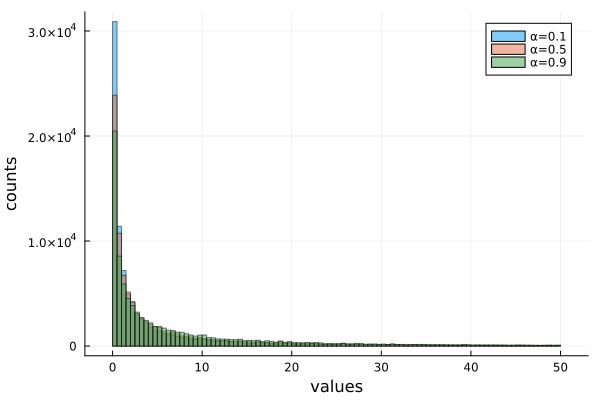

In [7]:
histogram(P_tran_ave[P_tran_ave.<=50], bins= 100, xlabel="values", ylabel="counts", label ="α="*string(α), alpha=:0.5)
histogram!(P_tran2_ave[P_tran2_ave.<=50], bins= 100, xlabel="values", ylabel="counts", label ="α="*string(α2), alpha=:0.5)
histogram!(P_tran3_ave[P_tran3_ave.<=50], bins= 100, xlabel="values", ylabel="counts", label ="α="*string(α3), alpha=:0.5)

ave_P: 18.108930098925093


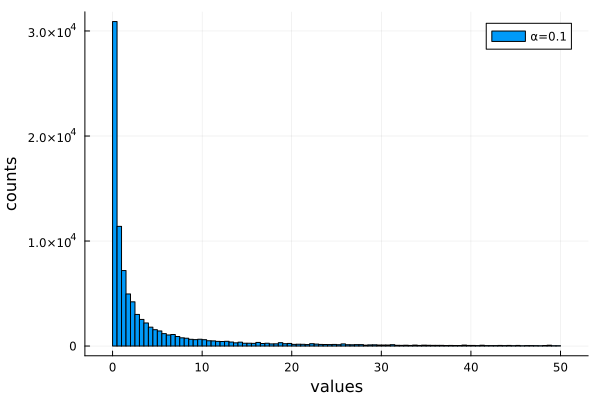

In [8]:
println("ave_P: ", mean(P_tran_ave))
histogram(P_tran_ave[P_tran_ave.<=50], bins= 100, xlabel="values", ylabel="counts", label ="α="*string(α))

ave_P: 17.4816656754422


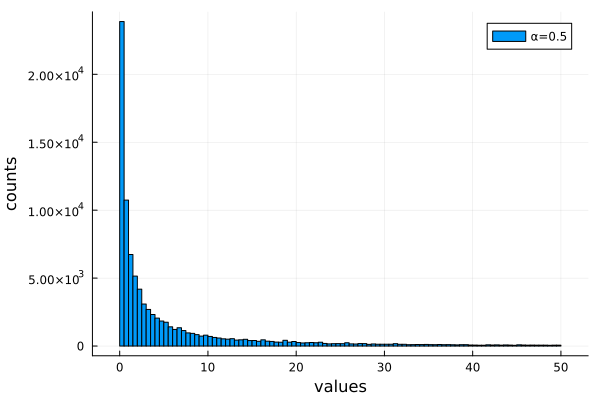

In [9]:
println("ave_P: ",mean(P_tran2_ave))
histogram(P_tran2_ave[P_tran2_ave.<=50], bins= 100, xlabel="values", ylabel="counts", label ="α="*string(α2))

ave_P: 17.138099465850832


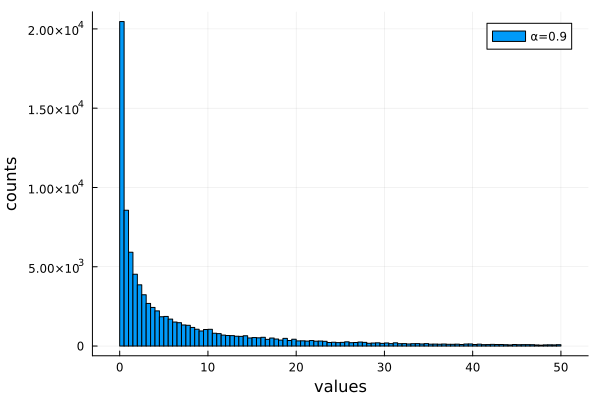

In [10]:
println("ave_P: ",mean(P_tran3_ave))
histogram(P_tran3_ave[P_tran3_ave.<=50], bins= 100, xlabel="values", ylabel="counts", label ="α="*string(α3))